<a href="https://colab.research.google.com/github/agerk/deepLearning/blob/master/NetworkArchitectures_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Neural networks with PyTorch

In [3]:
!pip install --upgrade torch torchvision; 

    100% |████████████████████████████████| 519.5MB 25kB/s 
tcmalloc: large alloc 1073750016 bytes == 0x58e3a000 @  0x7f71551392a4 0x591a07 0x5b5d56 0x502e9a 0x506859 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x504c28 0x502540 0x502f3d 0x507641
    100% |████████████████████████████████| 61kB 21.8MB/s 
    100% |████████████████████████████████| 2.0MB 4.4MB/s 
  Found existing installation: Pillow 4.0.0
    Uninstalling Pillow-4.0.0:
      Successfully uninstalled Pillow-4.0.0


In [0]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

import numpy as np
import torch 
# import helper_pytorch 
import matplotlib.pyplot as plt

In [5]:
torch.__version__

'0.4.1'

In [6]:
# Load MNIST dataet

from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5)),])

# Download and load the training data
train_data = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True)

Processing...
Done!


In [7]:
data_iter = iter(train_loader)
images, labels = data_iter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


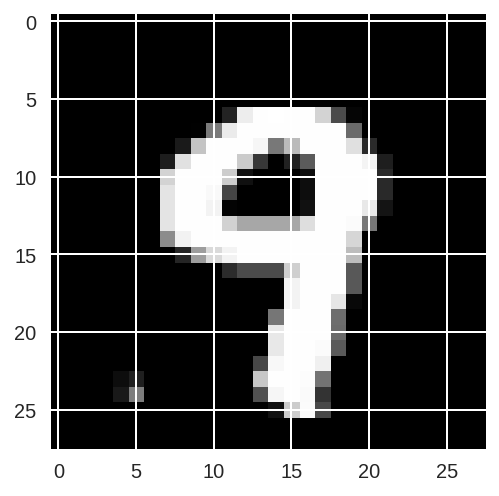

In [8]:
# Plot sample image
plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r');

Flatten the batch of images images. Then build a multi-layer network with 784 input units, 256 hidden units, and 10 output units using random tensors for the weights and biases.

In [9]:
# Define activatio sigmoid function
def activation(x):
  return 1/(1+torch.exp(-x))

hidden_units = 256
output_units = 10

# Flatten inputs with a batch of 64
inputs = images.view(images.shape[0], -1)
print("Input layer shape: ", inputs.shape)

# Input layer
w1 = torch.randn(inputs.shape[1], hidden_units)
b1 = torch.randn(hidden_units)
a = activation(torch.mm(inputs, w1) + b1)

# Output layer
w2 = torch.randn(hidden_units, output_units)
b2 = torch.randn(output_units)

output = torch.mm(a, w2) + b2
output.shape

Input layer shape:  torch.Size([64, 784])


torch.Size([64, 10])

To calculate this probability distribution, we often use the **softmax** function. Mathematically this looks like

$$
\Large \sigma(x_i) = \cfrac{e^{x_i}}{\sum_k^K{e^{x_k}}}
$$

In [10]:
# Define sotmax
def softmax(x):
  """Returns probability distribution of output"""
  numerator = torch.exp(x)
  denominator = torch.sum(torch.exp(x), dim=1)   # sum across columns
  # reshape deno
  denominator = denominator.view(-1, 1)
  print("Shape of denominator: ", denominator.shape)
  
  return numerator/denominator

# Get probability dist of the previous netwoek
probabilities = softmax(output)
# Check if the shape is (64, 10)
print(probabilities.shape)

# Does is sum to 1?
print(probabilities.sum(dim=1))

Shape of denominator:  torch.Size([64, 1])
torch.Size([64, 10])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])


## Building networks with PyTorch

Building network using nn module. Building a network with 784 inputs, 256 hidden units, and 10 output units and softmax

In [0]:
from torch import nn

In [0]:
class Network(nn.Module):
  """ class inherits modules from nn"""
  def __init__(self):
    """Registering network architecture and inheriting methods and attributes from nn class"""
    super().__init__()
    
    # Define network architecture
    self.hidden = nn.Linear(786, 256)
    self.output = nn.Linear(256, 10)
    
    # Instantiate sigmoid activation and softmax for output layer
    self.sigmoid = nn.Sigmoid()
    self.softmax = nn.Softmax(dim=1)
    
  def forward(self, x):
    """Creates the forward architecture of the network"""
    x = self.hidden(x)
    x = self.sigmoid(x)
    x = self.output(x)
    x = self.softmax(x)
    
    return x

In [13]:
# Create a model and examine network architecture
model = Network()
model

Network(
  (hidden): Linear(in_features=786, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax()
)

PyTorch has `functional` module to define network concisely. The 'import torch.nn.functional as F' is the common wat to import this module

In [0]:
import torch.nn.functional as F

class Network(nn.Module):
  """ class inherits modules from nn"""
  def __init__(self):
    """Registering network architecture and inheriting methods and attributes from nn class"""
    super().__init__()
    
    # Define network architecture
    self.hidden = nn.Linear(786, 256)
    self.output = nn.Linear(256, 10)
  
    
  def forward(self, x):
    """Creates the forward architecture of the network"""
    x = F.sigmoid(self.hidden(x))
    x = F.softmax(self.output(x), dim=1)
    
    return x

In [15]:
# Create a model and examine network architecture
model = Network()
model

Network(
  (hidden): Linear(in_features=786, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
)

> **Exercise:** Create a network with 784 input units, a hidden layer with 128 units and a ReLU activation, then a hidden layer with 64 units and a ReLU activation, and finally an output layer with a softmax activation as shown above. You can use a ReLU activation with the `nn.ReLU` module or `F.relu` function.

In [0]:
class Network_2(nn.Module):
  def __init__(self):
    super().__init__()
    
    # Define network architecture
    self.hidden = nn.Linear(784, 128)
    self.hidden_2 = nn.Linear(128, 64)
    self.output = nn.Linear(64, 10)
  
    
  def forward(self, x):
    """Creates the forward architecture of the network"""
    x = F.relu(self.hidden(x))
    x = F.relu(self.hidden_2(x))
    x = F.softmax(self.output(x), dim=1)
    
    return x

In [17]:
model = Network_2()
model

Network_2(
  (hidden): Linear(in_features=784, out_features=128, bias=True)
  (hidden_2): Linear(in_features=128, out_features=64, bias=True)
  (output): Linear(in_features=64, out_features=10, bias=True)
)

### Initializing weights and biases

The weights and such are automatically initialized for you, but it's possible to customize how they are initialized. The weights and biases are tensors attached to the layer you defined, you can get them with `model.fc1.weight` for instance.

In [18]:
print(model.hidden.weight)
print(model.hidden.bias)

Parameter containing:
tensor([[-0.0232, -0.0257, -0.0237,  ..., -0.0012, -0.0160, -0.0111],
        [-0.0157, -0.0096,  0.0155,  ..., -0.0133, -0.0045, -0.0145],
        [-0.0131, -0.0297, -0.0240,  ..., -0.0145, -0.0111, -0.0154],
        ...,
        [-0.0202,  0.0133,  0.0278,  ...,  0.0158, -0.0290, -0.0181],
        [ 0.0092, -0.0205, -0.0215,  ..., -0.0047,  0.0220, -0.0339],
        [-0.0220,  0.0299, -0.0110,  ..., -0.0067, -0.0331,  0.0230]],
       requires_grad=True)
Parameter containing:
tensor([-0.0202,  0.0321,  0.0227, -0.0069, -0.0139,  0.0078,  0.0164, -0.0335,
         0.0292, -0.0106, -0.0145, -0.0288,  0.0316,  0.0329, -0.0331,  0.0272,
        -0.0191,  0.0100, -0.0014, -0.0286, -0.0207,  0.0012, -0.0050,  0.0321,
         0.0221, -0.0352, -0.0183,  0.0345, -0.0153,  0.0237, -0.0141, -0.0075,
        -0.0009, -0.0229,  0.0253,  0.0057, -0.0188, -0.0238, -0.0218, -0.0026,
        -0.0016,  0.0256,  0.0062,  0.0355, -0.0340, -0.0246,  0.0062,  0.0273,
        -0.0260

For custom initialization, we want to modify these tensors in place. These are actually autograd *Variables*, so we need to get back the actual tensors with `model.fc1.weight.data`. Once we have the tensors, we can fill them with zeros (for biases) or random normal values.

In [19]:
# Set biases to all zeros
model.hidden.bias.data.fill_(0);
model.hidden_2.bias.data.fill_(0);

# Sample from random normal with standard dev = 0.01
model.hidden.weight.data.normal_(std=0.01);
model.hidden_2.weight.data.normal_(std=0.01)

tensor([[ 0.0019, -0.0052,  0.0026,  ..., -0.0076,  0.0038,  0.0184],
        [ 0.0087, -0.0008, -0.0031,  ..., -0.0067,  0.0057, -0.0164],
        [-0.0035,  0.0022, -0.0065,  ..., -0.0081,  0.0031, -0.0010],
        ...,
        [-0.0097, -0.0002,  0.0055,  ..., -0.0087,  0.0006,  0.0127],
        [-0.0170, -0.0019, -0.0029,  ...,  0.0016, -0.0125,  0.0001],
        [ 0.0057, -0.0029, -0.0079,  ...,  0.0145, -0.0113,  0.0069]])

In [0]:
# Define helper function to visualize class probability
def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    
    Args: 
      img: image tensor, 
      ps: forward pass
      
    Returns:
      plot of class probability
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()


### Forward pass

Pass images through the network

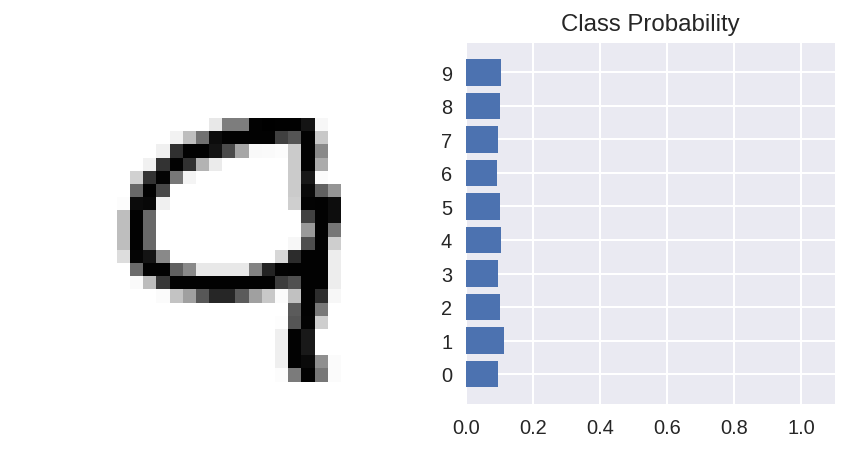

In [21]:
# Grab some image data
data_iter = iter(train_loader)
images, labels = data_iter.next()

# Flatten images into a 1D vector. Vector size will be (batch_size, color_channels, image_pixez)
images.resize_(64, 1, 784)

# Foreard pass through the network
img_idx = 0
ps = model.forward(images[img_idx,:])

img = images[img_idx]
view_classify(img.view(1, 28, 28), ps)

### Using nn.Sequential

- It provides a convenient way to build network by passing tensors sequentially through operations. 

In [22]:
# Hyperparameters 
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

# Build a feed-forward network
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                     nn.ReLU(),
                     nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                     nn.ReLU(),
                     nn.Linear(hidden_sizes[1], output_size),
                     nn.Softmax(dim=1))
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): Softmax()
)


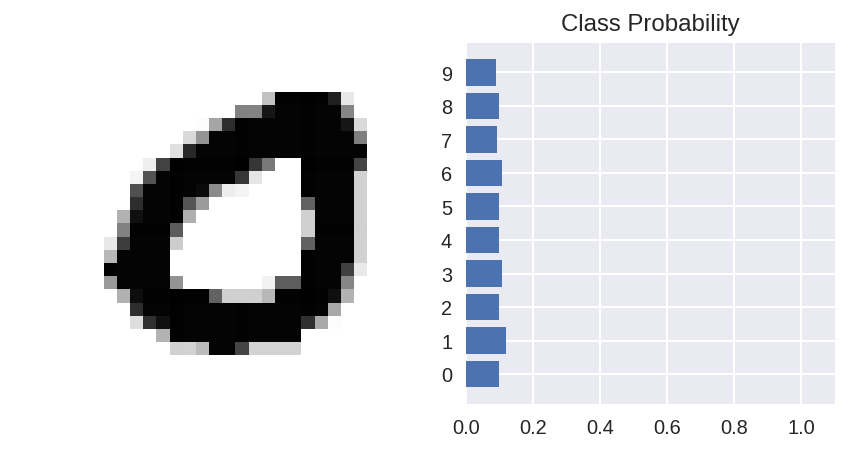

In [23]:
# Forward passing through the network
images, labels = next(iter(train_loader))
images.resize_(images.shape[0], 1, 784)
ps = model.forward(images[0,:])
view_classify(images[0].view(1, 28, 28), ps)

We can also pass in an `OrderedDict` to name the individual layers and operations, instead of using incremental integers. Note that dictionary keys must be unique, so _each operation must have a different name_.

In [24]:
from collections import OrderedDict

model = nn.Sequential(OrderedDict([
    ('fc1', nn.Linear(input_size, hidden_sizes[0])),
    ('relu1', nn.ReLU()),
    ('fc2', nn.Linear(hidden_sizes[0], hidden_sizes[1])),
    ('relu2', nn.ReLU()),
    ('outpur', nn.Linear(hidden_sizes[1], output_size)),
    ('softmax', nn.Softmax(dim=1))
]))

model
                      

Sequential(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (relu2): ReLU()
  (outpur): Linear(in_features=64, out_features=10, bias=True)
  (softmax): Softmax()
)

In [25]:
# We can access layers either b integer or the name
print(model[0])
print(model.fc1)

Linear(in_features=784, out_features=128, bias=True)
Linear(in_features=784, out_features=128, bias=True)


## Training Neural Networks

In [26]:
# Build a feed-forward network
model = nn.Sequential(OrderedDict([
    ('fc1', nn.Linear(input_size, hidden_sizes[0])),
    ('relu1', nn.ReLU()),
    ('fc2', nn.Linear(hidden_sizes[0], hidden_sizes[1])),
    ('relu2', nn.ReLU()),
    ('outpur', nn.Linear(hidden_sizes[1], output_size))
    
]))

# Define the loss
criterion = nn.CrossEntropyLoss()

# Fetch data
images, labels = next(iter(train_loader))

# Flatten images
images = images.view(images.shape[0], -1)

# Forward pass, get logits
logits = model(images)

# Calculate the loss with the logits and the labels
loss = criterion(logits, labels)
print(loss)

tensor(2.3266, grad_fn=<NllLossBackward>)


It's more convenient to build the model with a log-softmax output using `nn.LogSoftmax` or `F.log_softmax` ([documentation](https://pytorch.org/docs/stable/nn.html#torch.nn.LogSoftmax)). Then you can get the actual probabilities by taking the exponential `torch.exp(output)`. With a log-softmax output, you want to use the negative log likelihood loss, `nn.NLLLoss` ([documentation](https://pytorch.org/docs/stable/nn.html#torch.nn.NLLLoss)).


>**Exercise:** Build a model that returns the log-softmax as the output and calculate the loss using the negative log likelihood loss. Note that for `nn.LogSoftmax` and `F.log_softmax` you'll need to set the `dim` keyword argument appropriately. `dim=0` calculates softmax across the rows, so each column sums to 1, while `dim=1` calculates across the columns so each row sums to 1. Think about what you want the output to be and choose `dim` appropriately.

In [27]:
model = nn.Sequential(OrderedDict([
    ('fc1', nn.Linear(input_size, hidden_sizes[0])),
    ('relu1', nn.ReLU()),
    ('fc2', nn.Linear(hidden_sizes[0], hidden_sizes[1])),
    ('relu2', nn.ReLU()),
    ('outpur', nn.Linear(hidden_sizes[1], output_size)),
    ('logSoftmax', nn.LogSoftmax(dim=1))   # using lof-softmax instead of actual prob
    
]))

# Define the loss
criterion = nn.NLLLoss()

# Fetch data
images, labels = next(iter(train_loader))

# Flatten images
images = images.view(images.shape[0], -1)

# Forward pass, get logits
log_probability = model(images)

# Calculate the loss with the logits and the labels
loss = criterion(log_probability, labels)
print(loss)

tensor(2.3037, grad_fn=<NllLossBackward>)


## Autograd

- For automatic calculation of the gradient for backpropagation

In [28]:
x = torch.randn(2, 2, requires_grad=True)
print(x)

tensor([[ 1.0788, -0.3422],
        [ 0.6404, -0.4107]], requires_grad=True)


In [29]:
y = x**2
print(y)

tensor([[1.1638, 0.1171],
        [0.4101, 0.1687]], grad_fn=<PowBackward0>)


In [30]:
# grad_fn shows the function that generated this variable
print(y.grad_fn)

In [31]:
z = y.mean()
print(z)

tensor(0.4649, grad_fn=<MeanBackward1>)


In [32]:
print(x.grad)

None


To calculate the gradients, you need to run the `.backward` method on a Variable, `z` for example. This will calculate the gradient for `z` with respect to `x`

$$
\frac{\partial z}{\partial x} = \frac{\partial}{\partial x}\left[\frac{1}{n}\sum_i^n x_i^2\right] = \frac{x}{2}
$$

In [33]:
# To calculate the gradient, we need to run the .backward method on a Variable, z for example. 
z.backward()
print(x.grad)
print(x/2)

tensor([[ 0.5394, -0.1711],
        [ 0.3202, -0.2054]])
tensor([[ 0.5394, -0.1711],
        [ 0.3202, -0.2054]], grad_fn=<DivBackward0>)


## Loss and Autograd together

In [34]:
print('Before backward pass: \n', model[0].weight.grad)
loss.backward()
print('Aftwr backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
Aftwr backward pass: 
 tensor([[ 0.0051,  0.0051,  0.0051,  ...,  0.0051,  0.0051,  0.0051],
        [ 0.0049,  0.0049,  0.0049,  ...,  0.0049,  0.0049,  0.0049],
        [ 0.0005,  0.0005,  0.0005,  ...,  0.0005,  0.0005,  0.0005],
        ...,
        [ 0.0002,  0.0002,  0.0002,  ...,  0.0002,  0.0002,  0.0002],
        [-0.0039, -0.0039, -0.0039,  ..., -0.0039, -0.0039, -0.0039],
        [ 0.0001,  0.0001,  0.0001,  ...,  0.0001,  0.0001,  0.0001]])


## Training the network

General process of training with PyTorch

- Make a forward pass through the network
- Use the network output to calculate the loss
- Perform a backward pass through the network with `loss.backward()` to calculate gradients
- Take a step with the optimizer to update the weights

Optimizers let's update weightss with the gradeintsvfrom backprop

In [0]:
from torch import optim

# Optimizers requires the parameters to optimize and a learning rate
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [36]:
print("Initial weights -", model[0].weight)

images, labels = next(iter(train_loader))
images.resize_(64, 784)

# Clear the gradient. PyTorch by defualy accumulate gradients
optimizer.zero_grad()

# Forward pass, then backward pass, then update weights
output = model.forward(images)
loss = criterion(output, labels)
loss.backward()
print("Gradient - ", model[0].weight)

Initial weights - Parameter containing:
tensor([[-0.0160, -0.0226, -0.0270,  ..., -0.0170,  0.0141, -0.0180],
        [-0.0343, -0.0083, -0.0085,  ..., -0.0158,  0.0170,  0.0140],
        [ 0.0036,  0.0356,  0.0252,  ..., -0.0090, -0.0067, -0.0338],
        ...,
        [-0.0084, -0.0068,  0.0341,  ...,  0.0310,  0.0105,  0.0282],
        [ 0.0241,  0.0172, -0.0123,  ...,  0.0265, -0.0089, -0.0243],
        [-0.0166,  0.0256, -0.0233,  ...,  0.0064,  0.0015, -0.0249]],
       requires_grad=True)
Gradient -  Parameter containing:
tensor([[-0.0160, -0.0226, -0.0270,  ..., -0.0170,  0.0141, -0.0180],
        [-0.0343, -0.0083, -0.0085,  ..., -0.0158,  0.0170,  0.0140],
        [ 0.0036,  0.0356,  0.0252,  ..., -0.0090, -0.0067, -0.0338],
        ...,
        [-0.0084, -0.0068,  0.0341,  ...,  0.0310,  0.0105,  0.0282],
        [ 0.0241,  0.0172, -0.0123,  ...,  0.0265, -0.0089, -0.0243],
        [-0.0166,  0.0256, -0.0233,  ...,  0.0064,  0.0015, -0.0249]],
       requires_grad=True)


In [37]:
# Take an update step and few the net weights
optimizer.step()
print("Updated weight - ", model[0].weight)

Updated weight -  Parameter containing:
tensor([[-0.0159, -0.0226, -0.0270,  ..., -0.0169,  0.0141, -0.0180],
        [-0.0343, -0.0083, -0.0085,  ..., -0.0158,  0.0170,  0.0139],
        [ 0.0036,  0.0356,  0.0252,  ..., -0.0089, -0.0067, -0.0338],
        ...,
        [-0.0084, -0.0068,  0.0341,  ...,  0.0310,  0.0105,  0.0282],
        [ 0.0241,  0.0172, -0.0123,  ...,  0.0265, -0.0089, -0.0243],
        [-0.0166,  0.0256, -0.0233,  ...,  0.0064,  0.0015, -0.0249]],
       requires_grad=True)


### Implementing training loop


In [38]:
model = nn.Sequential(nn.Linear(784, 128),
                     nn.ReLU(),
                     nn.Linear(128, 64),
                     nn.ReLU(),
                     nn.Linear(64, 10),
                     nn.LogSoftmax(dim=1))
criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003)

epoch = 5

for e in range(epoch):
  running_loss = 0
  for images, labels in train_loader:
    images = images.view(images.shape[0], -1)   # flatten
    
    # Training pass
    optimizer.zero_grad()   # zero out gradients
    output = model.forward(images)
    loss = criterion(output, labels)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()
    
  else:
    print(f"Training loss: { running_loss/len(train_loader)}")

Training loss: 1.8020380913321652
Training loss: 0.7530420531850379
Training loss: 0.49969292714842345
Training loss: 0.42173379986906356
Training loss: 0.3826850441886164


Check model predicitons

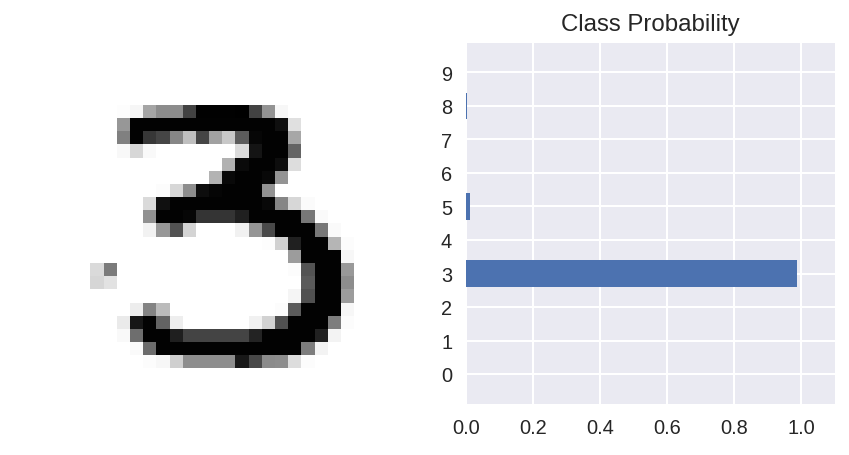

In [39]:
img = images[25].view(1, 784)

# Turn-off gradient to speed up predicition
with torch.no_grad():
  log_prob = model.forward(img)
  
# Output of the network are log prob, need to take softmax for probability
ps = F.softmax(log_prob, dim=1)
view_classify(img.view(1, 28, 28), ps)

## Classifyigng Clothing Images


In [40]:
# Load data

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
train_loader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
test_loader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

Processing...
Done!


In [0]:
def imshow(image, ax=None, title=None, normalize=True):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax

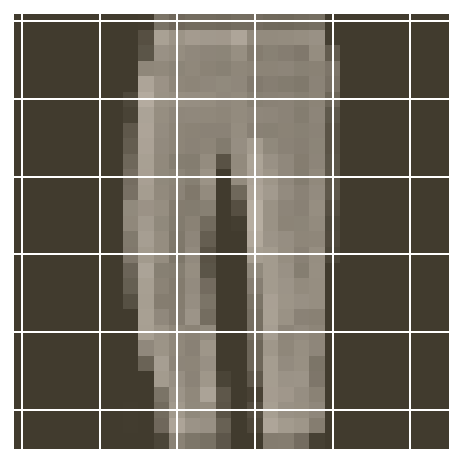

In [42]:
# Sample data
image, label = next(iter(train_loader))
imshow(image[0,:]);

## Building the network

Here you should define your network. As with MNIST, each image is 28x28 which is a total of 784 pixels, and there are 10 classes. Include at least one hidden layer with ReLU activations for the layers and to return the logits or log-softmax from the forward pass. I

In [43]:
# Define your network architecture 
model_classifier = nn.Sequential(nn.Linear(784, 256),
                     nn.ReLU(),
                     nn.Linear(256, 128),
                     nn.ReLU(),
                     nn.Linear(128, 64),
                     nn.ReLU(),
                     nn.Linear(64, 10),
                     nn.LogSoftmax(dim=1))
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

epoch = 10

# Training loop
for e in range(epoch):
  running_loss = 0
  for images, labels in train_loader:
    images = images.view(images.shape[0], -1)   # flatten
    
    # Training pass
    optimizer.zero_grad()   # zero out gradients
    output = model.forward(images)
#     output = model(images)
    loss = criterion(output, labels)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()
    
  else:
    print(f"Training loss: { running_loss/len(train_loader)}")

Training loss: 0.5172464898400215
Training loss: 0.3727160583554046
Training loss: 0.33726307405019873
Training loss: 0.311822462310669
Training loss: 0.2929659509963827
Training loss: 0.2806628826282807
Training loss: 0.26705426799018245
Training loss: 0.2569707122597613
Training loss: 0.24719379126612565
Training loss: 0.23777981934501036


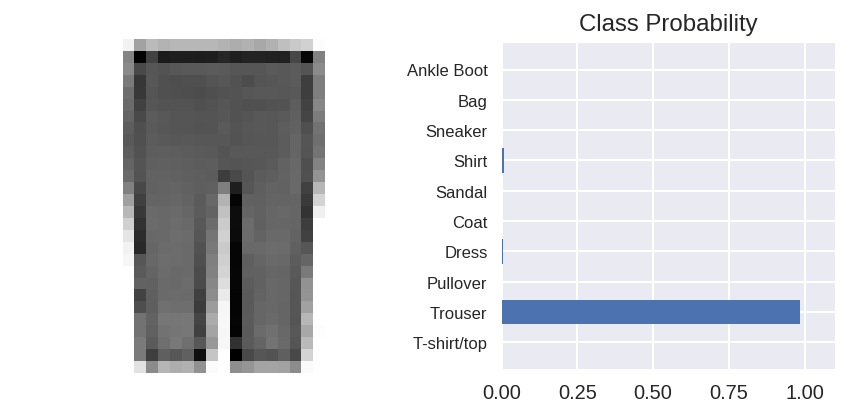

In [44]:
img = images[25].view(1, 784)

# Turn-off gradient to speed up predicition
with torch.no_grad():
  log_prob = model_classifier.forward(img)

# Test out your network!
dataiter = iter(test_loader)
images, labels = dataiter.next()
img = images[1]
# Convert 2D image to 1D vector
img = img.resize_(1, 784)

# Calculate the class probabilities (softmax) for img
ps = torch.exp(model(img))

# Plot the image and probabilities
view_classify(img, ps, version='Fashion')

## Inference and Validation


In [0]:
# Define a model
class Classifier(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(784, 256)
    self.fc2 = nn.Linear(256, 128)
    self.fc3 = nn.Linear(128, 64)
    self.fc4 = nn.Linear(64, 10)
    
  def forward(self, x):
    # Flatten input tensor
    x = x.view(x.shape[0], -1)
    
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = F.log_softmax(self.fc4(x), dim=1)
    
    return x

In [50]:
# Make prediction
# Instantiate a model 
model = Classifier()

images, labels = next(iter(test_loader))

# Get the class probability
ps = torch.exp(model(images))

# Check shape (64, 10)
print(ps.shape)

torch.Size([64, 10])


With the probabilities, we can get the most likely class using ps.topk method.

To get the highest values, most likely class, we can use ps.topk(1)

In [54]:
top_prob, top_class = ps.topk(1, dim=1)
print(top_class[:10, :])

tensor([[0],
        [9],
        [0],
        [0],
        [0],
        [9],
        [9],
        [0],
        [0],
        [0]])


In [61]:
# Compare if predicted class match actual labels
# top_class is A 2D TENSOR WITH SHAPE (64, 1)
# labels is 1D with shape (64)
equals = top_class == labels.view(*top_class.shape)   # make sure they have the same shape
equals[:10]

tensor([[0],
        [0],
        [0],
        [0],
        [1],
        [0],
        [0],
        [0],
        [0],
        [0]], dtype=torch.uint8)

In [63]:
# Accuracy is sum of correct prediction divide by number of examples
# Since its equals is binary, we can use the mean as accuracy
accuracy = torch.mean(equals.type(torch.FloatTensor))
print(f'Accuracy: {accuracy.item()*100}%')

Accuracy: 14.0625%


>**Exercise:** Implement the validation loop below and print out the total accuracy after the loop. You can largely copy and paste the code from above, but I suggest typing it in because writing it out yourself is essential for building the skill. In general you'll always learn more by typing it rather than copy-pasting. You should be able to get an accuracy above 80%.

In [79]:
model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

epochs = 30
steps = 0

train_losses, test_losses = [], []
for e in range(epochs):
  running_loss = 0
  for images, labels in train_loader:
    optimizer.zero_grad()
    
    log_ps = model(images)
    loss = criterion(log_ps, labels)
    loss.backward()
    optimizer.step()
    
    running_loss += loss.item()
    
  else:
    test_loss = 0
    accuracy = 0
    
    # Turn off gradients for validation, saves memeory and computations
    with torch.no_grad():
      for images, labels in test_loader:
        log_ps_test = model(images)
        test_loss += criterion(log_ps_test, labels)
        
        ps_test = torch.exp(log_ps_test)
        top_prob, top_class = ps_test.topk(1, dim=1)
        equals = top_class == labels.view(*top_class.shape)
        accuracy += torch.mean(equals.type(torch.FloatTensor))
    
    train_losses.append(running_loss/len(train_loader))
    test_losses.append(test_loss/len(test_loader)) 
    
    print("Epoch: {}/{}.. ".format(e+1, epochs),
          "Training Loss: {:.3f}..".format(running_loss/len(train_loader)),
          "Test Loss: {:.3f}..".format(test_loss/len(test_loader)),
          "Test Accuracy: {:.3f}".format(accuracy/len(test_loader)))
          

Epoch: 1/30..  Training Loss: 0.512.. Test Loss: 0.444.. Test Accuracy: 0.836
Epoch: 2/30..  Training Loss: 0.393.. Test Loss: 0.432.. Test Accuracy: 0.849
Epoch: 3/30..  Training Loss: 0.356.. Test Loss: 0.384.. Test Accuracy: 0.861
Epoch: 4/30..  Training Loss: 0.332.. Test Loss: 0.387.. Test Accuracy: 0.863
Epoch: 5/30..  Training Loss: 0.314.. Test Loss: 0.387.. Test Accuracy: 0.864
Epoch: 6/30..  Training Loss: 0.306.. Test Loss: 0.375.. Test Accuracy: 0.868
Epoch: 7/30..  Training Loss: 0.291.. Test Loss: 0.383.. Test Accuracy: 0.867
Epoch: 8/30..  Training Loss: 0.284.. Test Loss: 0.361.. Test Accuracy: 0.869
Epoch: 9/30..  Training Loss: 0.272.. Test Loss: 0.360.. Test Accuracy: 0.875
Epoch: 10/30..  Training Loss: 0.266.. Test Loss: 0.387.. Test Accuracy: 0.872
Epoch: 11/30..  Training Loss: 0.262.. Test Loss: 0.376.. Test Accuracy: 0.874
Epoch: 12/30..  Training Loss: 0.254.. Test Loss: 0.383.. Test Accuracy: 0.873
Epoch: 13/30..  Training Loss: 0.246.. Test Loss: 0.355.. Tes

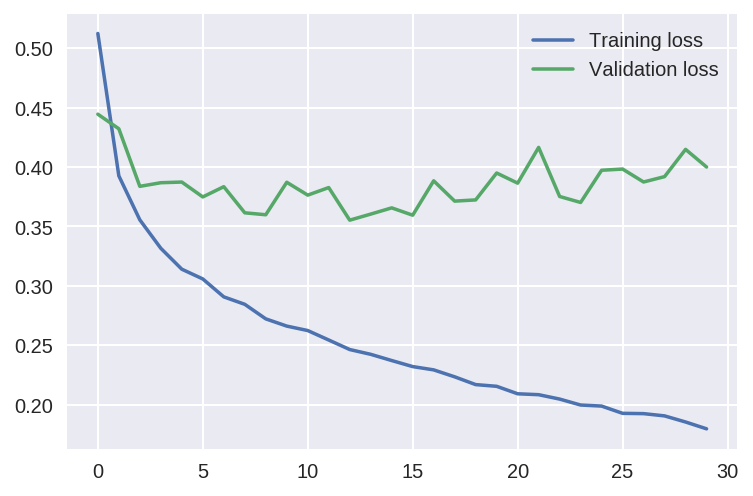

In [81]:
# Visualize learning curve
plt.plot(train_losses,label='Training loss')
plt.plot(test_losses,label='Validation loss')
plt.legend(frameon=False);

## Overfitting

The most common method to reduce overfitting (outside of early-stopping) is dropout, where we randomly drop input units. This forces the network to share information between weights, increasing it's ability to generalize to new data. Adding dropout in PyTorch is straightforward using the `nn.Dropout` module.

- We want to use dropout during training, but should turn off during serving

In [0]:
# Define a model with dropout regularizer

class Classifier(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(784, 256)
    self.fc2 = nn.Linear(256, 128)
    self.fc3 = nn.Linear(128, 64)
    self.fc4 = nn.Linear(64, 10)
    
    # Dropout module with 0.2 drop probability
    self.dropout = nn.Dropout(p=0.2)
    
  def forward(self, x):
    # Flatten input tensor
    x = x.view(x.shape[0], -1)
    
    # Including dropout
    x = self.dropout(F.relu(self.fc1(x)))
    x = self.dropout(F.relu(self.fc2(x)))
    x = self.dropout(F.relu(self.fc3(x)))
    
    # Output layer no dropout
    x = F.log_softmax(self.fc4(x), dim=1)
    
    return x

Training with dropout and monitoring learning curve

In [82]:
model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

epochs = 30
steps = 0

train_losses, test_losses = [], []
for e in range(epochs):
  running_loss = 0
  for images, labels in train_loader:
    optimizer.zero_grad()
    
    log_ps = model(images)
    loss = criterion(log_ps, labels)
    loss.backward()
    optimizer.step()
    
    running_loss += loss.item()
    
  else:
    test_loss = 0
    accuracy = 0
    
    # Turn off gradients for validation, saves memeory and computations
    with torch.no_grad():
      # Set model for evaluation model
      model.eval()
      
      for images, labels in test_loader:
        log_ps_test = model(images)
        test_loss += criterion(log_ps_test, labels)
        
        ps_test = torch.exp(log_ps_test)
        top_prob, top_class = ps_test.topk(1, dim=1)
        equals = top_class == labels.view(*top_class.shape)
        accuracy += torch.mean(equals.type(torch.FloatTensor))
    
    # set model back to train mode
    model.train()
    
    train_losses.append(running_loss/len(train_loader))
    test_losses.append(test_loss/len(test_loader)) 
    
    print("Epoch: {}/{}.. ".format(e+1, epochs),
          "Training Loss: {:.3f}..".format(running_loss/len(train_loader)),
          "Test Loss: {:.3f}..".format(test_loss/len(test_loader)),
          "Test Accuracy: {:.3f}".format(accuracy/len(test_loader)))
          

Epoch: 1/30..  Training Loss: 0.602.. Test Loss: 0.478.. Test Accuracy: 0.829
Epoch: 2/30..  Training Loss: 0.482.. Test Loss: 0.428.. Test Accuracy: 0.846
Epoch: 3/30..  Training Loss: 0.445.. Test Loss: 0.395.. Test Accuracy: 0.856
Epoch: 4/30..  Training Loss: 0.432.. Test Loss: 0.413.. Test Accuracy: 0.850
Epoch: 5/30..  Training Loss: 0.425.. Test Loss: 0.425.. Test Accuracy: 0.854
Epoch: 6/30..  Training Loss: 0.416.. Test Loss: 0.395.. Test Accuracy: 0.857
Epoch: 7/30..  Training Loss: 0.408.. Test Loss: 0.423.. Test Accuracy: 0.860
Epoch: 8/30..  Training Loss: 0.400.. Test Loss: 0.385.. Test Accuracy: 0.863
Epoch: 9/30..  Training Loss: 0.396.. Test Loss: 0.407.. Test Accuracy: 0.852
Epoch: 10/30..  Training Loss: 0.391.. Test Loss: 0.400.. Test Accuracy: 0.855
Epoch: 11/30..  Training Loss: 0.386.. Test Loss: 0.389.. Test Accuracy: 0.867
Epoch: 12/30..  Training Loss: 0.388.. Test Loss: 0.392.. Test Accuracy: 0.861
Epoch: 13/30..  Training Loss: 0.380.. Test Loss: 0.369.. Tes

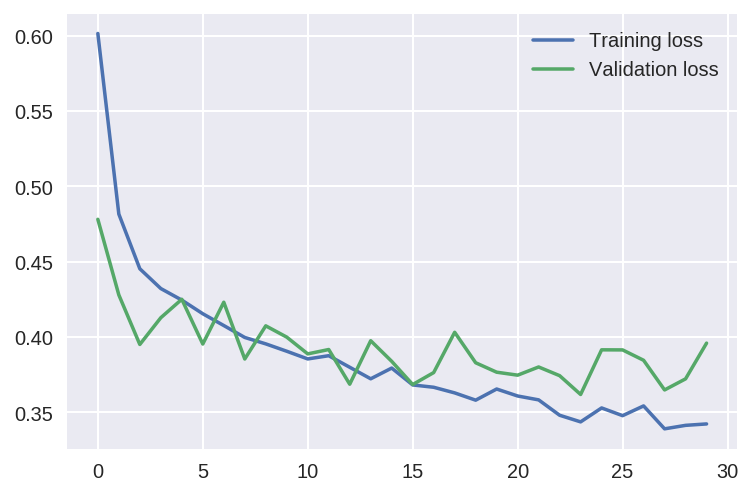

In [83]:
# Visualize learning curve with dropout 
plt.plot(train_losses,label='Training loss')
plt.plot(test_losses,label='Validation loss')
plt.legend(frameon=False);

### Inference

Now that the model is trained, we can use it for inference. Set the model in inference mode with model.eval(). And turn off autograd with the torch.no_grad() context.

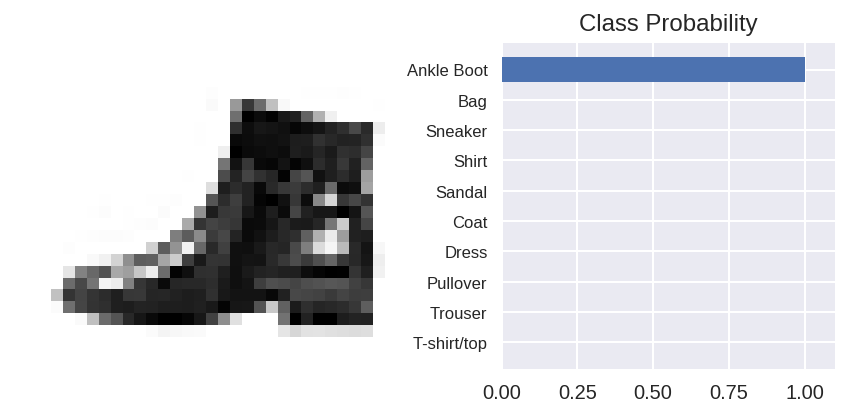

In [85]:
# Activate model instance for inference
model.eval()

dataiter = iter(test_loader)
images, labels = dataiter.next()
img = images[0]
# Convert 2D image to 1D vector
img = img.view(1, 784)

# Calculate the class probabilities (softmax) for img
with torch.no_grad():
    output = model.forward(img)

ps = torch.exp(output)

# Plot the image and probabilities
view_classify(img.view(1, 28, 28), ps, version='Fashion')

### Saving and Loading Trained Models

In [0]:
# %writefile fc_model.py   
import torch
from torch import nn
import torch.nn.functional as F


class Network(nn.Module):
    def __init__(self, input_size, output_size, hidden_layers, drop_p=0.5):
        ''' Builds a feedforward network with arbitrary hidden layers.
        
            Arguments
            ---------
            input_size: integer, size of the input layer
            output_size: integer, size of the output layer
            hidden_layers: list of integers, the sizes of the hidden layers
        
        '''
        super().__init__()
        # Input to a hidden layer
        self.hidden_layers = nn.ModuleList([nn.Linear(input_size, hidden_layers[0])])
        
        # Add a variable number of more hidden layers
        layer_sizes = zip(hidden_layers[:-1], hidden_layers[1:])
        self.hidden_layers.extend([nn.Linear(h1, h2) for h1, h2 in layer_sizes])
        
        self.output = nn.Linear(hidden_layers[-1], output_size)
        
        self.dropout = nn.Dropout(p=drop_p)
        
    def forward(self, x):
        ''' Forward pass through the network, returns the output logits '''
        
        for each in self.hidden_layers:
            x = F.relu(each(x))
            x = self.dropout(x)
        x = self.output(x)
        
        return F.log_softmax(x, dim=1)


def validation(model, testloader, criterion):
    accuracy = 0
    test_loss = 0
    for images, labels in testloader:

        images = images.resize_(images.size()[0], 784)

        output = model.forward(images)
        test_loss += criterion(output, labels).item()

        ## Calculating the accuracy 
        # Model's output is log-softmax, take exponential to get the probabilities
        ps = torch.exp(output)
        # Class with highest probability is our predicted class, compare with true label
        equality = (labels.data == ps.max(1)[1])
        # Accuracy is number of correct predictions divided by all predictions, just take the mean
        accuracy += equality.type_as(torch.FloatTensor()).mean()

    return test_loss, accuracy


def train(model, trainloader, testloader, criterion, optimizer, epochs=5, print_every=40):
    
    steps = 0
    running_loss = 0
    for e in range(epochs):
        # Model in training mode, dropout is on
        model.train()
        for images, labels in trainloader:
            steps += 1
            
            # Flatten images into a 784 long vector
            images.resize_(images.size()[0], 784)
            
            optimizer.zero_grad()
            
            output = model.forward(images)
            loss = criterion(output, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()

            if steps % print_every == 0:
                # Model in inference mode, dropout is off
                model.eval()
                
                # Turn off gradients for validation, will speed up inference
                with torch.no_grad():
                    test_loss, accuracy = validation(model, testloader, criterion)
                
                print("Epoch: {}/{}.. ".format(e+1, epochs),
                      "Training Loss: {:.3f}.. ".format(running_loss/print_every),
                      "Test Loss: {:.3f}.. ".format(test_loss/len(testloader)),
                      "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))
                
                running_loss = 0
                
                # Make sure dropout and grads are on for training
                model.train()


In [0]:
# Create the network, define the criterion and optimizer
model = Network(784, 10, [500, 100])
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [90]:
# Train the network
train(model, train_loader, test_loader, criterion, optimizer, epochs=2)

Epoch: 1/2..  Training Loss: 1.446..  Test Loss: 0.819..  Test Accuracy: 0.719
Epoch: 1/2..  Training Loss: 0.902..  Test Loss: 0.689..  Test Accuracy: 0.732
Epoch: 1/2..  Training Loss: 0.828..  Test Loss: 0.624..  Test Accuracy: 0.764
Epoch: 1/2..  Training Loss: 0.729..  Test Loss: 0.606..  Test Accuracy: 0.775
Epoch: 1/2..  Training Loss: 0.680..  Test Loss: 0.592..  Test Accuracy: 0.780
Epoch: 1/2..  Training Loss: 0.659..  Test Loss: 0.572..  Test Accuracy: 0.793
Epoch: 1/2..  Training Loss: 0.611..  Test Loss: 0.539..  Test Accuracy: 0.801
Epoch: 1/2..  Training Loss: 0.619..  Test Loss: 0.563..  Test Accuracy: 0.795
Epoch: 1/2..  Training Loss: 0.642..  Test Loss: 0.545..  Test Accuracy: 0.798
Epoch: 1/2..  Training Loss: 0.622..  Test Loss: 0.530..  Test Accuracy: 0.795
Epoch: 1/2..  Training Loss: 0.619..  Test Loss: 0.515..  Test Accuracy: 0.812
Epoch: 1/2..  Training Loss: 0.575..  Test Loss: 0.521..  Test Accuracy: 0.808
Epoch: 1/2..  Training Loss: 0.575..  Test Loss: 0.5

### Saving and loading networks
The parameters for PyTorch networks are stored in a model's `state_dict`. We can see the state dict contains the weight and bias matrices for each of our layers.

In [91]:
print('Trained model: \n\n', model, '\n')
print("The state dict keys: \n\n", model.state_dict().keys())

Trained model: 

 Network(
  (hidden_layers): ModuleList(
    (0): Linear(in_features=784, out_features=500, bias=True)
    (1): Linear(in_features=500, out_features=100, bias=True)
  )
  (output): Linear(in_features=100, out_features=10, bias=True)
  (dropout): Dropout(p=0.5)
) 

The state dict keys: 

 odict_keys(['hidden_layers.0.weight', 'hidden_layers.0.bias', 'hidden_layers.1.weight', 'hidden_layers.1.bias', 'output.weight', 'output.bias'])


The simplest thing to do is simply save the state dict with `torch.save`. For example, we can save it to a file `'checkpoint.pth'`.

In [0]:
torch.save(model.state_dict(), 'checkpoint.pth')

Then we can load the state dict with `torch.load`

In [94]:
state_dict = torch.load('checkpoint.pth')
# Check if model is loaded properly
print(state_dict.keys())

odict_keys(['hidden_layers.0.weight', 'hidden_layers.0.bias', 'hidden_layers.1.weight', 'hidden_layers.1.bias', 'output.weight', 'output.bias'])


Load the state dict into the network with `model.load_state_dict(state_dict)`

In [0]:
model.load_state_dict(state_dict)

Loading the state dict works only if the model architecture is exactly the same as the checkpoint architecture. 

In [96]:
# Create net network
model = Network(784, 10, [400, 200, 100])
model.load_state_dict(state_dict)

RuntimeError: ignored

This means we need to rebuild the model exactly as it was when trained. Information about the model architecture needs to be saved in the checkpoint, along with the state dict. To do this,  build a dictionary with all the information needed to compeletely rebuild the model.

In [0]:
# Rebuilding exactly as it was bult
checkpoint = {'input_size': 784,
              'output_size': 10,
             'hidden_layers': [each.out_features for each in model.hidden_layers],
             'state_dict': model.state_dict()}
torch.save(checkpoint, 'checkpoint.pth')

Now the checkpoint has all the necessary information to rebuild the trained model. You can easily make that a function if you want. Similarly, we can write a function to load checkpoints

In [0]:
def load_checkpoint(filepath):
  checkpoint = torch.load(filepath)
  
  model = Network(checkpoint['input_size'],
                 checkpoint['output_size'],
                 checkpoint['hidden_layers'])
  model.load_state_dict(checkpoint['state_dict'])
  
  return model

In [104]:
model = load_checkpoint('checkpoint.pth')
print(model)

Network(
  (hidden_layers): ModuleList(
    (0): Linear(in_features=784, out_features=400, bias=True)
    (1): Linear(in_features=400, out_features=200, bias=True)
    (2): Linear(in_features=200, out_features=100, bias=True)
  )
  (output): Linear(in_features=100, out_features=10, bias=True)
  (dropout): Dropout(p=0.5)
)


*Note: This tutorial is based on Udacity's Introduction to PyTorch course. Please refer the course website for mode details. *